<a href="https://colab.research.google.com/github/Raghuram-Veeramallu/Astro_Stat_Project2/blob/harry/Project2_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2
### Group 3


Project Question

In [18]:
# load data for this instance
# !gdown 1LZts3qmmXzULOUMvNC97jIE9funj_BoK

### New dataset downloaded by Hari
!gdown 1v6LSAKvkuEjahtOWDNq3riBMLkD7rZD0

Downloading...
From: https://drive.google.com/uc?id=1v6LSAKvkuEjahtOWDNq3riBMLkD7rZD0
To: /content/snaeT1.tsv
100% 47.4k/47.4k [00:00<00:00, 92.1MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm
import arviz as az

In [3]:
## setting the theme for the grid
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [19]:
# df = pd.read_csv('/content/SNLightCurveParams.csv')

df = pd.read_csv('/content/snaeT1.tsv', sep='\t')

In [21]:
df.sample(10)

,zcmb,zhel,mb,e_mb,x1,e_x1,c,e_c,logMst
575,0.279,0.2796,21.448,0.118,-0.186,0.425,-0.122,0.041,10.232
724,0.061,0.0626,17.836,0.111,0.909,0.153,-0.041,0.016,8.985
285,0.180,0.1807,21.152,0.120,0.480,0.538,0.093,0.039,9.975
62,0.746,0.7441,23.856,0.096,0.789,0.314,-0.024,0.053,6.000
191,0.371,0.3720,22.212,0.086,0.254,0.070,-0.066,0.023,9.047
41,0.769,0.7700,24.546,0.097,-0.334,0.339,0.085,0.064,10.418
221,0.283,0.2820,22.152,0.086,0.088,0.095,0.089,0.022,9.589
136,0.700,0.6980,24.456,0.097,-2.642,0.471,0.006,0.070,10.941
186,0.507,0.5090,23.559,0.089,0.885,0.180,0.168,0.031,10.285
466,0.267,0.2680,21.207,0.116,0.323,0.313,-0.097,0.037,10.459


**Column Description:**.

| Column  | Description                 |
| ------- | --------------------------- |
| zcmb    | CMB Frame Redshift          |
| zhel    | Heliocentric Redshift       |
| mb      | B band peak magnitude (in mB)|
| e_mb    | Error in mb                 |


B band peak magnitude conversion to distance (trials)

Distance moduli $\mu$
$$ \mu = m_{B}^{*} - (M_{B} - \alpha X_{1} + \beta C)$$

where,  
$m_{B}^{*}$ is the observed peak magnitude in rest frame B band.  
$M_{B}$ is the absolute magnitude of the supernova (adjusted based on host galaxy's properties). It depends on the host galalxy's stellar mass ($M_{stellar}$).   
$$M_{B} = \begin{cases} M_{B}^{1} & \text{if $M_{stellar} < 10^{10} M_{\odot}$} \\
M_{B}^{1} + \Delta_{m} & \text{otherwise}
\end{cases}$$  
$\alpha, \beta$ are the nuisance parameters that account for the shape of the light curve ($X_{1}$) and the color of the supernova ($C$) respectively.  
$\beta, M_{B}$ are found to be dependent on the host galaxy properties.  


From the literature the values used are, $\alpha = 0.141, \beta = 3.101, M_{B}^{1} = -19.05$ and $\Delta_{M} = -0.07$ (according to the C11 analysis)

The absolute magnitude of type Ia in B-band is consistent, typically around $-19.3 \pm 0.3 $ in magnitude.

Modulus can be converted into distance using $ d_{L} = 10^{\mu/5 + 1} $.  
($\mu = 5 log_{10}{(d_{L} /10 pc)}$ according to the literature).

In [7]:
# defining the nuiscance parameters
alpha = 0.141
beta = 3.101
MB1 = -19.05
DeltaM = -0.07

In [30]:
# MB
df['MB'] = MB1 + (DeltaM * (df['logMst'] > 10))

# mu
df['dist_moduli'] = df['mb'] - (df['MB'] - alpha * df['x1'] + beta * df['c'])

# distance
df['Log10Distance'] = (df['dist_moduli']/5 + 1)

Getting a Log10 Distance for convinience

In [31]:
df['Log10Distance']

0      9.453741
1      9.567772
2      9.457462
3      9.296457
4      9.667244
         ...   
735    8.055787
736    7.988877
737    8.054767
738    8.012810
739    8.003522
Name: Log10Distance, Length: 740, dtype: float64

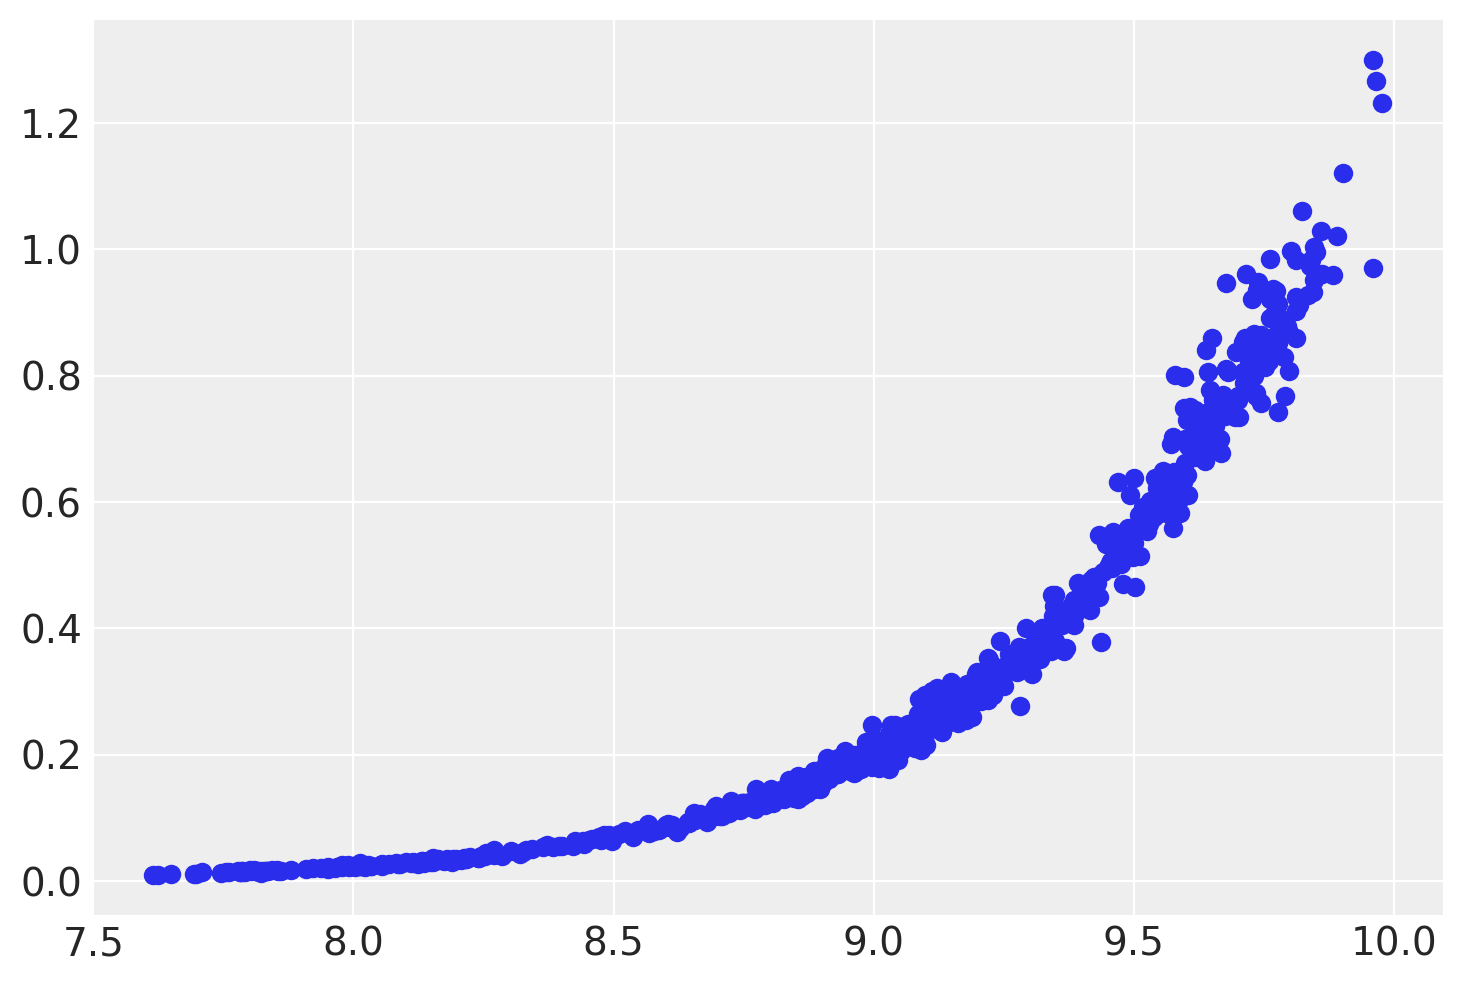

In [32]:
plt.scatter(df['Log10Distance'], df['zcmb'])

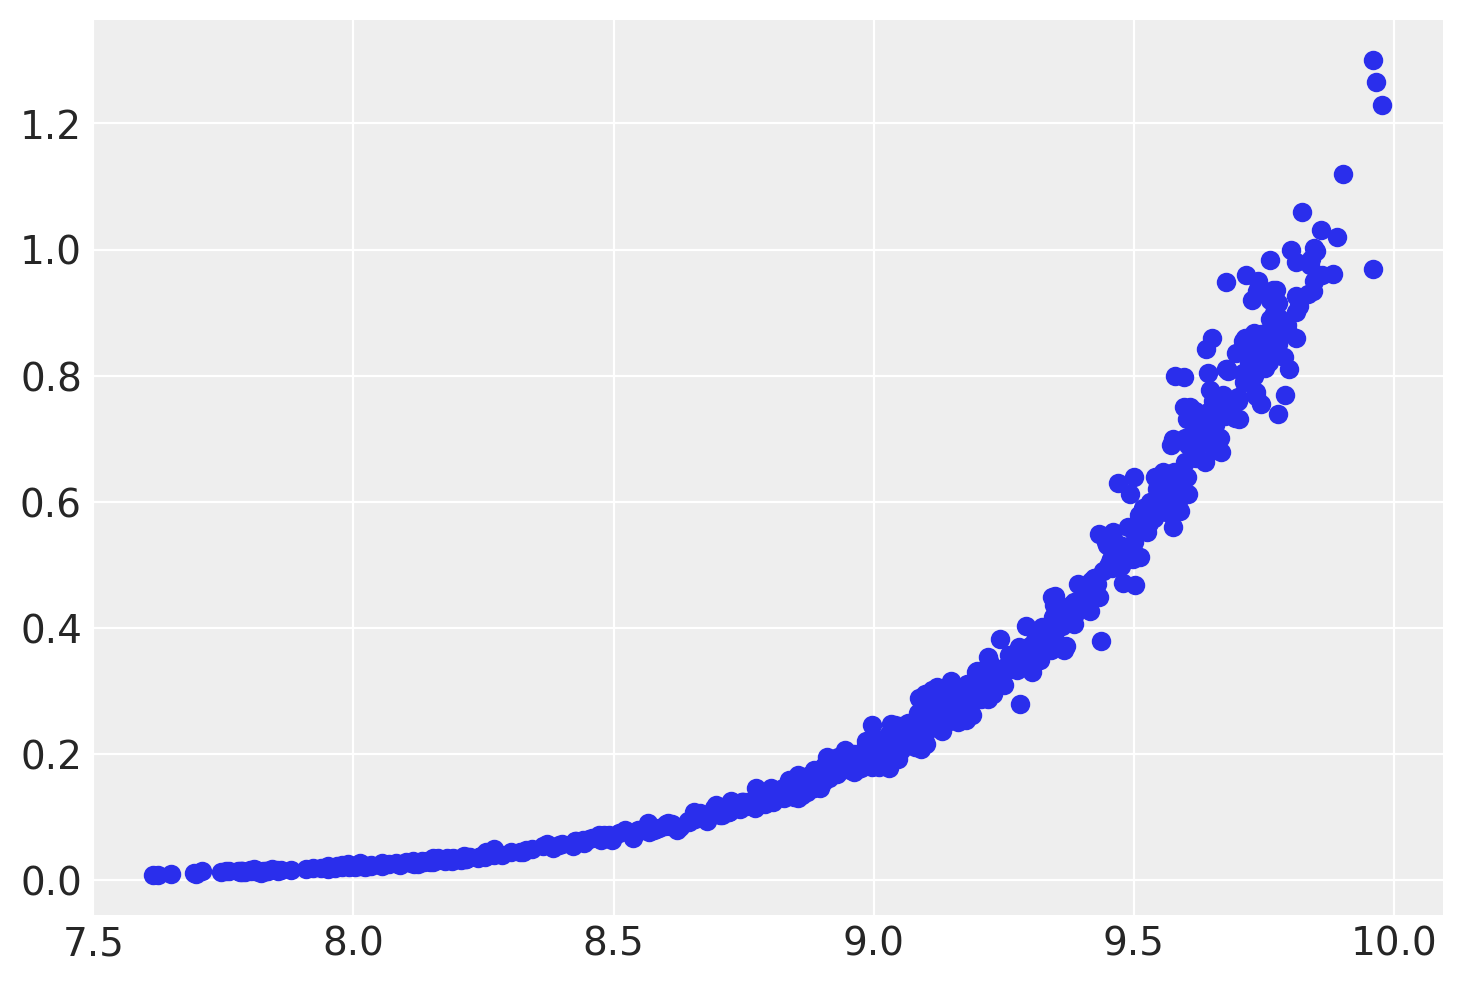

In [33]:
plt.scatter(df['Log10Distance'], df['zhel'])

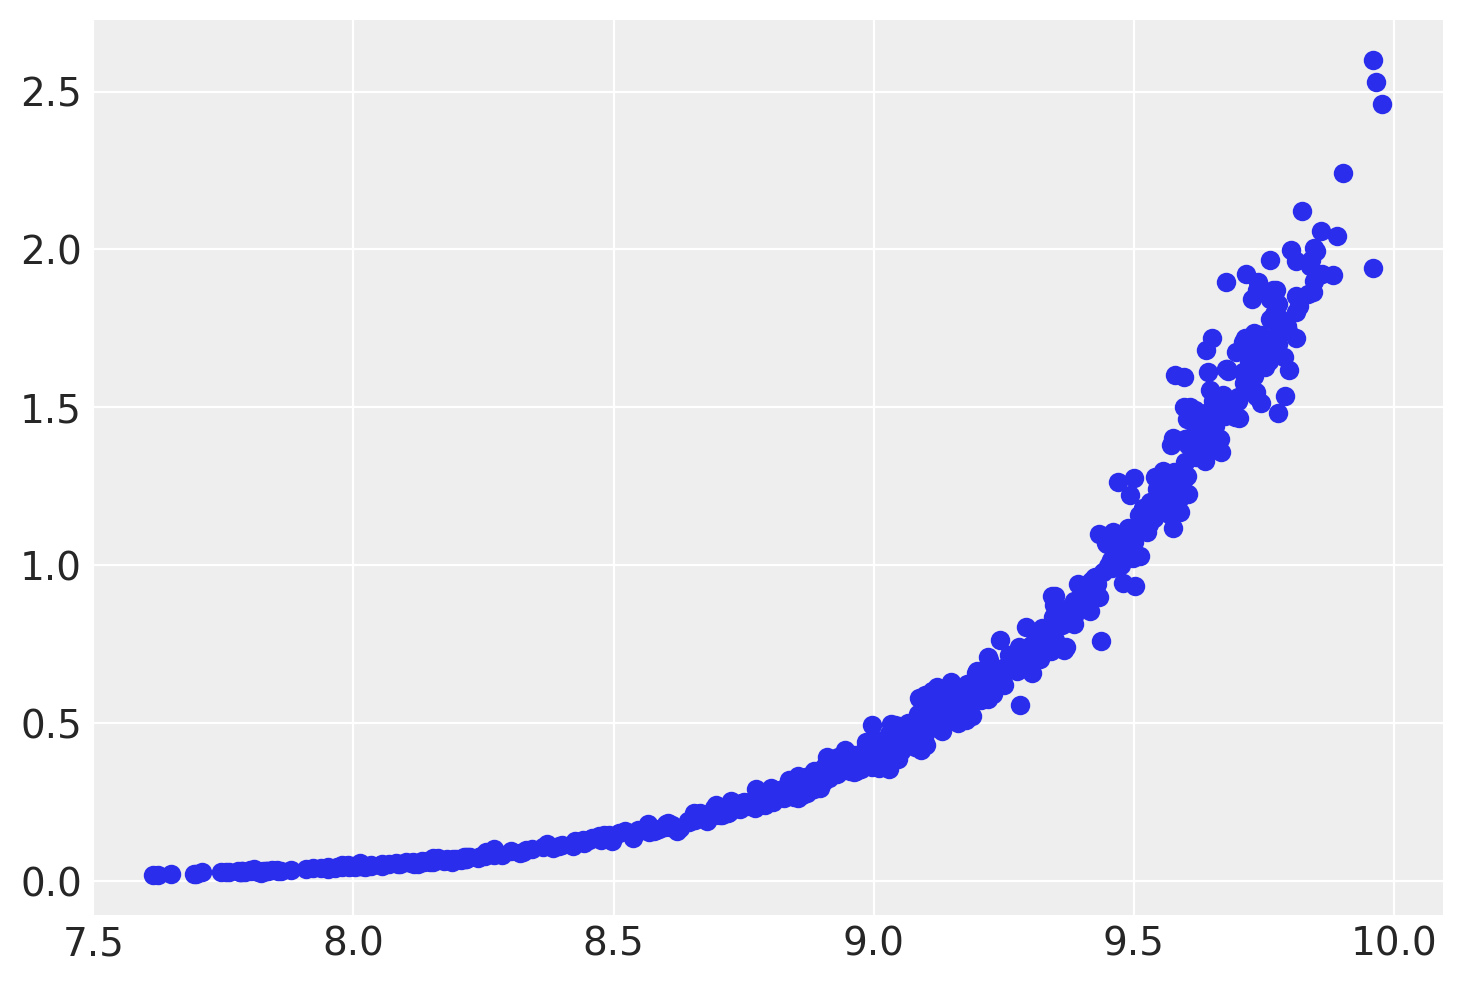

In [34]:
plt.scatter(df['Log10Distance'], df['zcmb'] + df['zhel'])